In [27]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import seaborn as sns
print('Libraries imported.')

Libraries imported.


In [28]:
# Toronto Open Data Catalogue - Neighbourhood Profiles 2016 (CSV)

csv_path='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')

Data loaded


In [29]:
df.head()

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designat

In [21]:
# Colecting neighborhoods names
Neighbourhoods = list(df.columns.values)
Neighbourhoods = Neighbourhoods[5:]
print(Neighbourhoods)

['Agincourt North', 'Agincourt South-Malvern West', 'Alderwood', 'Annex', 'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor', 'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park-Nortown', 'Beechborough-Greenbrook', 'Bendale', 'Birchcliffe-Cliffside', 'Black Creek', 'Blake-Jones', 'Briar Hill-Belgravia', 'Bridle Path-Sunnybrook-York Mills', 'Broadview North', 'Brookhaven-Amesbury', 'Cabbagetown-South St. James Town', 'Caledonia-Fairbank', 'Casa Loma', 'Centennial Scarborough', 'Church-Yonge Corridor', 'Clairlea-Birchmount', 'Clanton Park', 'Cliffcrest', 'Corso Italia-Davenport', 'Danforth', 'Danforth East York', 'Don Valley Village', 'Dorset Park', 'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB', 'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley', 'Eglinton East', 'Elms-Old Rexdale', 'Englemount-Lawrence', 'Eringate-Centennial-West Deane', 'Etobicoke West Mall', 'Flemingdon Park', 'Forest Hill North', 'Forest Hill South', 'Glenfield-Jane Heig

In [22]:
#Collecting Population per neighborhood and Creating a new dataset

dfToronto = pd.DataFrame(index=Neighbourhoods, columns=["Population_2016","Income_2016"])
dfToronto.head()

,Population_2016,Income_2016
Agincourt North,NaN,NaN
Agincourt South-Malvern West,NaN,NaN
Alderwood,NaN,NaN
Annex,NaN,NaN
Banbury-Don Mills,NaN,NaN


In [30]:
# Populating the dataset with the data

for index, row in dfToronto.iterrows():
    dfToronto.at[index, 'Population_2016'] = df[index][2]
    dfToronto.at[index, 'Income_2016'] = df[index][2264]
    
dfToronto.sort_values('Income_2016')

,Population_2016,Income_2016
St.Andrew-Windfields,"17,812","100,516"
Edenbridge-Humber Valley,"15,535","101,551"
Lawrence Park North,"14,607","111,730"
Annex,"30,526","112,766"
Yonge-St.Clair,"12,528","114,174"
Bedford Park-Nortown,"23,236","123,077"
Leaside-Bennington,"16,828","125,564"
Kingsway South,"9,271","144,642"
Casa Loma,"10,968","165,047"
Lawrence Park South,"15,179","169,203"


AxesSubplot(0.125,0.125;0.775x0.755)


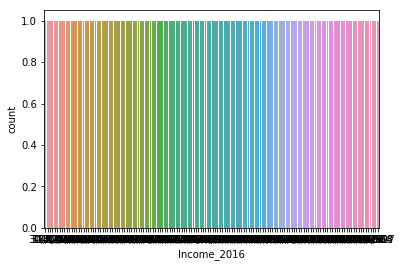

In [33]:
income=sns.countplot(dfToronto['Income_2016'])
print (income)

AxesSubplot(0.125,0.125;0.775x0.755)


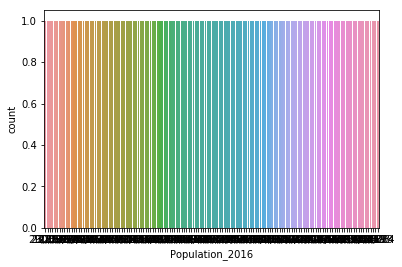

In [35]:
population=sns.countplot(dfToronto['Population_2016'])
print (population)

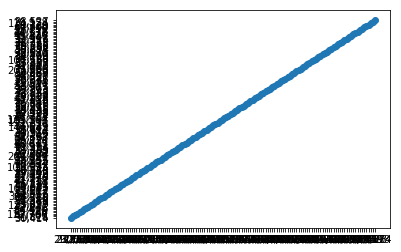

In [40]:
import matplotlib.pyplot as plt

x=dfToronto['Population_2016']
y=dfToronto['Income_2016']
 
plt.scatter(x, y)
plt.show()